In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
df = pd.read_csv('Salary_Data.csv')

In [55]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [57]:
X = df['YearsExperience']
y = df['Salary']

### Karena cman 1 kolom/dimensi maka perlu diubah jadi 2 dimensi

In [58]:
import numpy as np
X = X[:,np.newaxis]

/var/folders/cj/8z1bv1p953g0p_y_b68ql7m80000gn/T/ipykernel_36661/3177718668.py:2: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



Berikutnya kita buat objek support vector regression dan di sini kita akan mencoba menggunakan parameter C = 1000, gamma = 0.05, dan kernel ‘rbf’. Setelah model dibuat kita akan melatih model dengan fungsi fit pada data.

In [59]:
from sklearn.svm import SVR
model = SVR(C=1000, gamma=0.05, kernel='rbf')

In [60]:
model.fit(X, y)

SVR(C=1000, gamma=0.05)

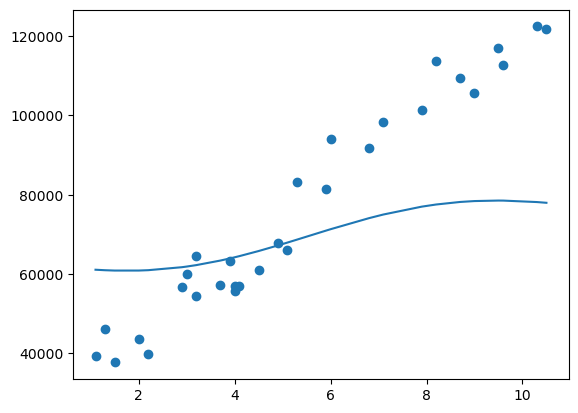

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y)
plt.plot(X, model.predict(X))

In [62]:
import plotly.express as px
import plotly.graph_objects as go

fig1 = px.scatter(X, y)
fig2 = px.line(X, model.predict(X))
fig3 = go.Figure(data = fig1.data+fig2.data, layout =fig2.layout )
fig3.show()

# GRID SEARCH
##### - UNTUK MENENTUKAN PARAMETER/TUNING TERBAIK PADA MODEL MAKA PERLU MENCOBA MERUBAH PARAMETER
##### - UNTUK KOMBINASI BEBERAPA PARAMETER AKAN MUDAH DILAKUKAN DENGAN GRID SEARCH

In [69]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

model = SVR()
params = dict(kernel=['rbf'], C=[1000, 10000, 100000], gamma=[0.5, 0.05,0.005])
gridsearch = GridSearchCV(model, params)
gridsearch.fit(X, y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']})

In [70]:
print(
    "The best parameters are %s with a score of %0.2f"
    % (gridsearch.best_params_, gridsearch.best_score_)
)

The best parameters are {'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'} with a score of 0.05


In [76]:
modeloke = SVR(C=100000, gamma=0.05, kernel='rbf')
modeloke.fit(X, y)

SVR(C=100000, gamma=0.05)

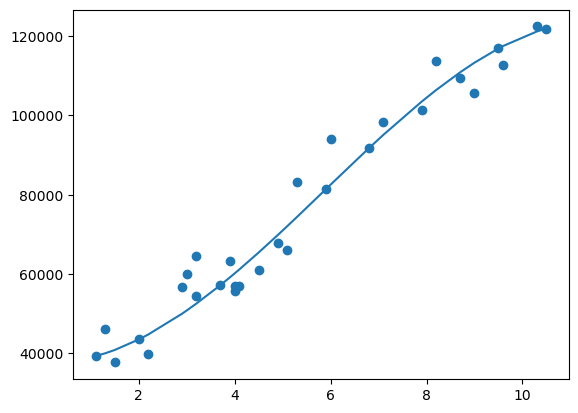

In [77]:
plt.scatter(X, y)
plt.plot(X, modeloke.predict(X))

In [78]:
fig1 = px.scatter(X, y)
fig2 = px.line(X, modeloke.predict(X))
fig3 = go.Figure(data = fig1.data+fig2.data, layout =fig2.layout )
fig3.show()